Epoch 1/10
2612/2612 [==============================] - 2s 630us/step - loss: 1.5186 - accuracy: 0.6968 - val_loss: 0.9709 - val_accuracy: 0.7803
Epoch 2/10
2612/2612 [==============================] - 2s 666us/step - loss: 1.0042 - accuracy: 0.7321 - val_loss: 0.5536 - val_accuracy: 0.8222
Epoch 3/10
2612/2612 [==============================] - 2s 742us/step - loss: 0.8627 - accuracy: 0.7515 - val_loss: 0.6235 - val_accuracy: 0.8205
Epoch 4/10
2612/2612 [==============================] - 2s 646us/step - loss: 0.8666 - accuracy: 0.7576 - val_loss: 1.0957 - val_accuracy: 0.7589
Epoch 5/10
2612/2612 [==============================] - 2s 617us/step - loss: 0.8112 - accuracy: 0.7641 - val_loss: 1.0513 - val_accuracy: 0.7645
Epoch 6/10
2612/2612 [==============================] - 2s 604us/step - loss: 0.8403 - accuracy: 0.7613 - val_loss: 0.6600 - val_accuracy: 0.7516
Epoch 7/10
2612/2612 [==============================] - 2s 611us/step - loss: 0.7508 - accuracy: 0.7727 - val_loss: 0.6133 -

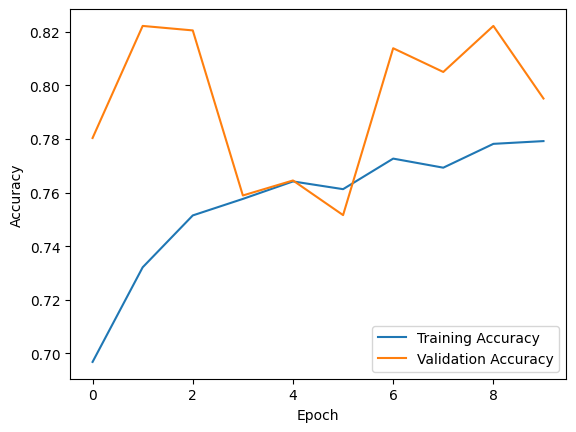

653/653 [==============================] - 0s 361us/step


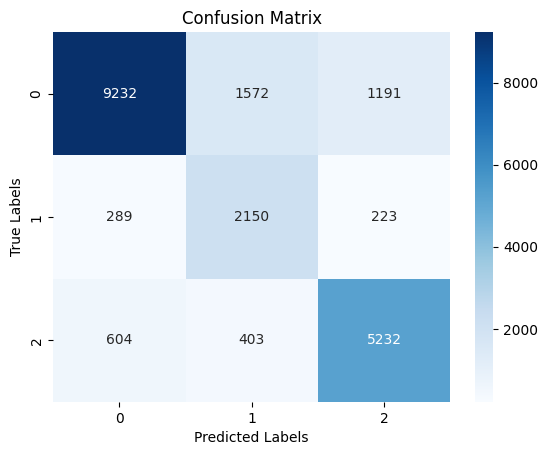

In [7]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to load data from multiple files
def load_activity_data(activity, file_prefix, num_files):
    data_list = []
    for i in range(1, num_files + 1):
        file_path = f"Data/{activity}/{file_prefix} {i}cleaned.csv"
        data = np.genfromtxt(file_path, delimiter=',')
        data_list.append(data)
    return np.concatenate(data_list, axis=0)

# Load data for each activity
reading_data = load_activity_data("Reading", "r", 6)
speaking_data = load_activity_data("Speaking", "s", 4)
watching_data = load_activity_data("Watching", "w", 6)

# Create labels for each activity

# 0 represents reading
reading_labels = np.full((reading_data.shape[0],), fill_value=0) 
# 1 represents speaking  
speaking_labels = np.full((speaking_data.shape[0],), fill_value=1)
# 2 represents watching
watching_labels = np.full((watching_data.shape[0],), fill_value=2)  

# Concatenate data and labels
X = np.concatenate((reading_data, 
                    speaking_data, watching_data), axis=0)
y = np.concatenate((reading_labels, 
                    speaking_labels, watching_labels), axis=0)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
test_size=0.2, random_state=42)

# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)),

# 3 output neurons for 3 classes 
# (reading, speaking, watching)
    tf.keras.layers.Dense(3, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, 
    batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy']
         , label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)

# Decode labels if necessary
decoded_true_labels = label_encoder.inverse_transform(y_test)
decoded_predicted_labels = label_encoder.inverse_transform(
    np.argmax(predictions, axis=1))

# Create a confusion matrix and plot it with custom labels
conf_matrix = confusion_matrix(decoded_true_labels,
         decoded_predicted_labels)
class_labels = label_encoder.classes_

sns.heatmap(conf_matrix, annot=True, 
fmt='d', cmap='Blues', xticklabels=class_labels, 
yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [8]:
def sliding_window(data, labels, window_size):
    segments, new_labels = [], []
    for i in range(0, len(data) - window_size + 1, window_size):
        segment = data[i:i + window_size]
        segments.append(segment)
        new_labels.append(labels[i + window_size - 1])  # Use label for the last item in each segment
    return np.array(segments), np.array(new_labels)


In [9]:
# Modify X_train, X_test, y_train, y_test using sliding window
window_size = 100  # Define window size
X_train_windows, y_train_windows = sliding_window(X_train, y_train, window_size)
X_test_windows, y_test_windows = sliding_window(X_test, y_test, window_size)

# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(window_size, X_train.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile, train, and evaluate the model using X_train_windows, y_train_windows, X_test_windows, y_test_windows
# ...


Epoch 1/10
27/27 [==============================] - 0s 4ms/step - loss: 450.5047 - accuracy: 0.4120 - val_loss: 176.1737 - val_accuracy: 0.6106
Epoch 2/10
27/27 [==============================] - 0s 1ms/step - loss: 133.8954 - accuracy: 0.4096 - val_loss: 101.4900 - val_accuracy: 0.4279
Epoch 3/10
27/27 [==============================] - 0s 1ms/step - loss: 94.2540 - accuracy: 0.4228 - val_loss: 112.0966 - val_accuracy: 0.3317
Epoch 4/10
27/27 [==============================] - 0s 1ms/step - loss: 114.5978 - accuracy: 0.4323 - val_loss: 153.7266 - val_accuracy: 0.2356
Epoch 5/10
27/27 [==============================] - 0s 1ms/step - loss: 144.2747 - accuracy: 0.4275 - val_loss: 113.1603 - val_accuracy: 0.4519
Epoch 6/10
27/27 [==============================] - 0s 1ms/step - loss: 104.4937 - accuracy: 0.4527 - val_loss: 86.5764 - val_accuracy: 0.5433
Epoch 7/10
27/27 [==============================] - 0s 1ms/step - loss: 82.4367 - accuracy: 0.4491 - val_loss: 88.2381 - val_accuracy: 0.3

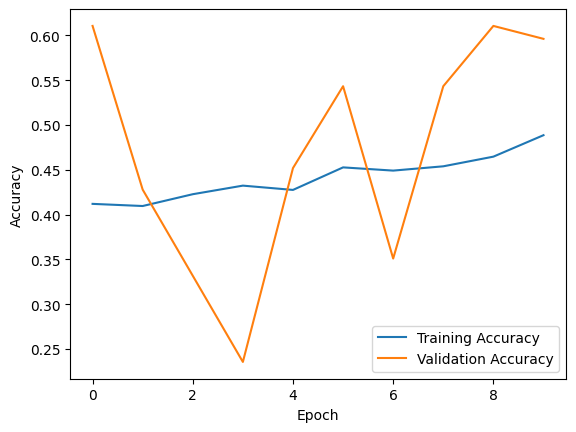

7/7 [==============================] - 0s 710us/step


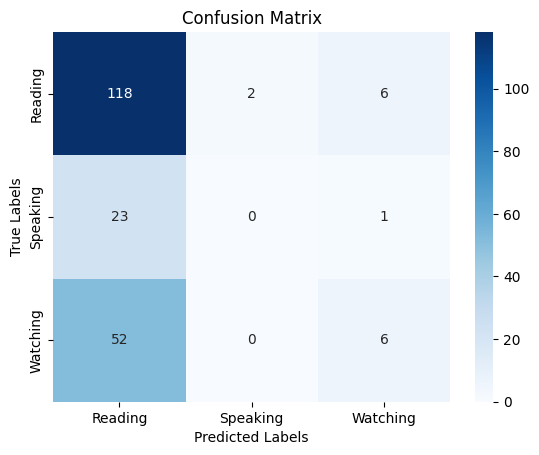

In [10]:
# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(window_size, X_train.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_windows, y_train_windows, epochs=10, batch_size=32, validation_data=(X_test_windows, y_test_windows))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test_windows)

# Decode labels if necessary
# (Use inverse_transform if LabelEncoder was used for encoding)
# decoded_true_labels = label_encoder.inverse_transform(y_test_windows)
# decoded_predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Create a confusion matrix and plot it with custom labels
conf_matrix = confusion_matrix(y_test_windows, np.argmax(predictions, axis=1))
class_labels = ['Reading', 'Speaking', 'Watching']

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split



# Function for sliding window with labels
def sliding_window_with_labels(window_size, signal, labels):
    segments = []
    segment_labels = []
    for i in range(0, len(signal) - window_size + 1, window_size):
        segment = signal[i:i + window_size]
        segment_label = labels[i]  # Adjust the label indexing as per your data
        segments.append(segment)
        segment_labels.append(segment_label)
    return np.array(segments), np.array(segment_labels)

# Choose your window size
window_size = 100  # Define your window size

# Apply sliding window function with labels
X, y = sliding_window_with_labels(window_size, data, labels)

# Reshape segments for CNN input
num_segments = len(X)
num_features = window_size
X = np.reshape(X, (num_segments, num_features, 1))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


IndexError: index 4200 is out of bounds for axis 0 with size 4170